### Lineární regrese $\textbf{y}=\textbf{X} \cdot \textbf{a}$
### iterativní metodou konjugovaných gradientů

např. pro:
 - tzv. řídké (sparse) matice $\textbf{A}=\textbf{X}^T\cdot\textbf{X}$, tj. pro problémy s více regresními parametry  (např. některé členy regresního vzorce mohou být zbytečné) 
 - nebo pro aproximaci dynamických systémů.


Nalezněte vektor regresních parametrů $\textbf{a}=[a_0 \ a_1 \ a_2 \ a_3]$ 
regresního modelu $z=f(x_r,z_r,\textbf{a})$

$$z=a_0+a_1\cdot x_r+a_2\cdot x_r \cdot y_r+a_3\cdot e^\left( \dfrac{x_r-y_r}{100}\right) $$

takže regresní model maticově pro všechna data je

$$\textbf{z}=\textbf{X}\cdot \textbf{a}^T$$

kde

$$\textbf{X}=\begin{bmatrix} 
1 & x_r[1] & x_r[1]\cdot y_r[1] & e^\left( \dfrac{x_r[1]-y_r[1]}{100}\right) \\
1 & x_r[2] & x_r[2]\cdot y_r[2] & e^\left( \dfrac{x_r[2]-y_r[2]}{100}\right) \\
\vdots  & \vdots    & \vdots & \vdots  \\
1 & x_r[N] & x_r[N]\cdot y_r[N] & e^\left( \dfrac{x_r[N]-y_r[N]}{100}\right) \\
\end{bmatrix}$$

A mějme situaci, kdy měřená data nejsou ideální:

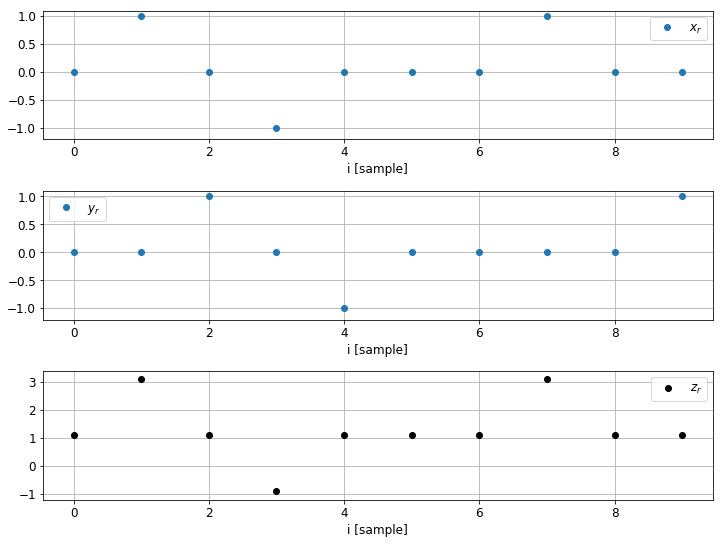

A= [[ 10.           1.           0.          10.0003    ]
 [  1.           3.           0.           1.0300505 ]
 [  0.           0.           0.           0.        ]
 [ 10.0003       1.0300505    0.          10.00120004]]
det(A)= 0.0


In [12]:
from numpy import *
from matplotlib.pyplot import *
%matplotlib inline
from __future__ import division
rcParams.update({'font.size': 12})  #font textu v grafech  
#------------------------------

N=10   # delka merenych dat

xr=zeros(N);xr[1]=1;xr[3]=-1;xr[7]=1  # merena data jsou "ridka"
yr=zeros(N);yr[2]=1;yr[4]=-1;yr[9]=1

zr=1+2*xr-0.5*xr*yr+.1*exp((xr-yr)/100)  # a=[1 , 1 , -.5 , 0.1]

X=ones((N,4))
X[:,1]=xr ; X[:,2]=xr*yr ; X[:,3]=exp((xr-yr)/100)

#---
figure(figsize=(12,9));subplots_adjust(hspace=.4)
subplot(311);plot(xr,'o',label="$x_r$");ylim(-1.2,1.1);legend()
xlabel('i [sample]');grid()
subplot(312);plot(yr,'o',label="$y_r$");ylim(-1.2,1.1);legend()
xlabel('i [sample]');grid()
subplot(313)
plot(zr,'ok',label="$z_r$")
legend();xlabel('i [sample]');ylim(min(zr)-.3,max(zr)+.3);grid()
show()

A=dot(X.T,X)
print "A=",A
print "det(A)=",linalg.det(A)

Determinant matice $\textbf{A}$ je nulový, co to znamená pro metodu nejmenších čtverců?

Zkusíme iterační metodu konjugovaných gradientů.

Metodu konjugovaných gradientů lze použít pro iterativní řešení (obecné) soustavy $n$ rovnic o $n$ neznámých

$$\textbf{A}\cdot\textbf{a}^T=\textbf{b}$$

kde

$\textbf{b}$ ... je $n \times 1$vektor pravých stran,

$\textbf{a}$ ... je $n\times 1$  vektor hledaných neznámých (regresních parametrů),

$\textbf{A}$ ... je $n\times n$ symetrická pozitivně definitní matice.

Pokud máme $N$ měření veličin $x,y,z$ a regresní model tedy $z_r=f(x_r,y_r,\textbf{a})$ 

tak pro $n$ neznámých, je v případě v-parametrech-lineárního regresního modelu vynásobením zleva

$$ \textbf{X}^T\cdot\textbf{X}\cdot\textbf{a}^T=\textbf{X}^T\cdot \textbf{z_r} \implies
\textbf{A}\cdot\textbf{a}^T=\textbf{b}
$$

což je stejné jako u metody nejmenších čtverců pomocí pseudoinverze. 

<hr>
#### Iterativní metodu konjugovaných gradientů lze pak prakticky shrnout do následujících kroků:####

<ol>
<li> Zvolíme náhodný počáteční vektor regresních prvků  $\textbf{a}$ (blízko očekávaným, nulové, nebo malé náhodné)   </li>
<li> Inicializujeme iterační parametry dosazením
$$\textbf{r}_\textbf{e}= \textbf{b}-\textbf{A}\cdot\textbf{a} \  $$ 
$$\textbf{p}= \textbf{r}_\textbf{e} \ $$
<hr></li>
<li>Vypočteme parametr $\alpha$
$$ \alpha=\frac{\textbf{r}_\textbf{e}^T\cdot\textbf{r}_\textbf{e}}{\textbf{p}^T
\cdot\textbf{A}\cdot\textbf{p}} \  $$    </li>
<li>Aktualizujeme vektor regresních parametrů 
$$\textbf{a}=\textbf{a}+\alpha\cdot\textbf{p} \  $$	</li>
<li>Aktualizujeme parametr $ \textbf{r}_{\textbf{e}}$
$$ \textbf{r}_{\textbf{e}_{pred}}=\textbf{r}_\textbf{e}$$
$$\textbf{r}_\textbf{e}= \textbf{r}_{\textbf{e}_{pred}}-\alpha
\cdot\textbf{A}\cdot\textbf{p}$$   </li>
<li>  Podle varianty Fletcher-Reeves aktualizujeme parametr metody $\beta$

$$\beta=\frac{\textbf{r}_\textbf{e}^T\cdot\textbf{r}_\textbf{e}}
{\textbf{r}_{\textbf{e}_{pred}}^T\cdot\textbf{r}_{\textbf{e}_{pred}}}   $$</li>
<li> Aktualizujeme parametr metody $\textbf{p}$ 
$$\textbf{p}=\textbf{r}_\textbf{e}+\beta\cdot\textbf{p}$$   </li>
<li> Pro další iteraci (update $\textbf{a}$) znovu od kroku 3. </li>
</ol>


konjug. grad. a=[a0 a1 a2 a3]= [ 1.   2.   0.   0.1]


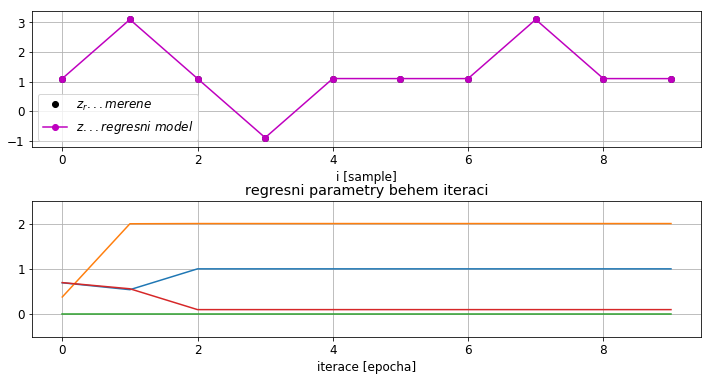

In [13]:
epochs=10   # pocet iteraci (epoch)

#a=random.randn(4);a=a/sum(abs(a)) # volba malych pocatecnich a
a=zeros(4)     # zkusíme inicializovat jako nulové

b=dot(X.T,zr)
A=dot(X.T,X)
re=b-dot(A,a)
p=re.copy()
a_all=zeros((epochs,4))
for epoch in range(epochs):
    alpha=dot(re.T,re)/(dot(dot(p.T,A),p))
    a=a+alpha*p
    re_prev=re.copy()
    re=re_prev-alpha*dot(A,p)
    beta=dot(re.T,re)/dot(re_prev.T,re_prev)
    p=re+beta*p
    a_all[epoch,:]=a
    
print "konjug. grad. a=[a0 a1 a2 a3]=",a

# TEST NALEZENEHO REGRESNIHO MODELU
z=dot(X,a)

figure(figsize=(12,6));subplots_adjust(hspace=.4)
subplot(211)
plot(zr,'ok',label="$z_r ... merene$");plot(z,'-om',label="$z ... regresni \ model$")
legend();xlabel('i [sample]');ylim(min(zr)-.3,max(zr)+.3);grid()
subplot(212)
plot(a_all);xlabel("iterace [epocha]");grid();title("regresni parametry behem iteraci")
ylim(-0.5,2.5)
show()

<div style="width:100%;height:5px;background-color:green;"> </div>

Metodou nejmenších čtverců:

In [14]:
A=dot(X.T,X)
b=dot(X.T,zr)
a=dot(linalg.inv(A),b)
print "metodou njm. čtv. a=",a

LinAlgError: Singular matrix

<div style="width:100%;height:10px;background-color:green;"> </div>
### Závěr:###

V datech se neprojevuje očekávaný člen regresního vztahu $-0.5\cdot x_r\cdot y_r$ (oba $x_r,y_r$ nebo alespoň jeden z nich jsou vždy nulové, a ani iterativně nemusí být $a_2$ správně nalezen)

Avšak zatímco metodou nejmenších čtverců nebylo možné žádné regresní parametry hledat kvůli nemožnosti inverze, iterativně se podařilo nalézt členy regresního vztahu $a_0,a_1,a_3$, které se v datech projevili.

Buďto je potřeba naměřit více rozmanitějších dat, nebo předpokládaný člen regresního vztahu není pro systém generující data vhodný (v systému jej nelze očekávat). 

